<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS14_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [71]:
# TODO - your code!

# Import

import pandas as pd

import numpy as np

from scipy import stats as st

import matplotlib.pyplot as plt



# Grab the file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 09:36:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-18 09:36:53 (277 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [0]:
# Load data into df

df=pd.read_csv('house-votes-84.data',names=['party','handicapped-infants',
                                            'water-project','budget',
                                            'physician-fee-freeze',
                                            'el-salvador-aid',
                                            'religious-groups',
                                            'anti-satellite-ban',
                                            'aid-to-contras','mx-missile',
                                            'immigration','synfuels',
                                            'education','right-to-sue','crime',
                                            'duty-free','south-africa'])
print(df.shape), df.head()

In [41]:
df = df.replace({'y':1, 'n':0,'?':0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [42]:
# Change alpha values to numeric representations
# Assuming no vote same as a no vote, same effect on the outcome

df = df.replace({'y':1, 'n':0,'?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [142]:
print('Total Yes votes =',df[bill].sum())
print('Democrat votes = ',dem[bill].sum())
print('Republican votes = ',rep[bill].sum())

Total Yes votes = 174
Democrat votes =  160
Republican votes =  14


In [0]:
}# Split the dataset into republicans and democrats

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [0]:
# Define function to compute confidence interval of 95%
# Passed in: data in the form of list
# Output: mean, mean-MOE, mean+MOE

def conf_int(data, conf=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
# Looking at bill that had dem support

bill = 'aid-to-contras'

# DEFINE FUNCTION to print confidence interval graphs

def ci_graph(bill):
  a1 = df[bill].to_numpy()
  a2 = dem[bill].to_numpy()
  a3 = rep[bill].to_numpy()
  txt = str(bill)
  x = txt.center(45)

  mean, lower, upper = confidence_interval(a1)

  df[bill].plot.density()
  CI = confidence_interval(df[bill])
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[0], color='green')
  plt.axvline(x=CI[2], color='red')
  class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

  print(color.GREEN + color.BOLD + color.UNDERLINE + x + color.END)
  print('Total Yes votes =',df[bill].sum())
  print('Democrat votes = ',dem[bill].sum())
  print('Republican votes = ',rep[bill].sum())

  print('Graph of total votes with a mean of ', mean)
  print('Mean - MOE = ',lower,' and mean + MOE = ',upper)


  plt.show()
  dem[bill].plot.density()
  CI = confidence_interval(df[bill])
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[0], color='green')
  plt.axvline(x=CI[2], color='red')


  print('Democrat votes on', bill, ' with a mean of ', mean)
  print('Mean - MOE =',lower)
  print('Mean + MOE =', upper)

  plt.show()
  rep[bill].plot.density()
  CI = confidence_interval(df[bill])
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[0], color='green')
  plt.axvline(x=CI[2], color='red')

  print('Republican votes on', bill, ' with a mean of ', mean)
  print('Mean - MOE =',lower)
  print('Mean + MOE =', upper)

  plt.show()




                  duty-free                  
Total Yes votes = 174
Democrat votes =  160
Republican votes =  14
Graph of total votes with a mean of  0.4
Mean - MOE =  0.35378088074308217  and mean + MOE =  0.4462191192569179


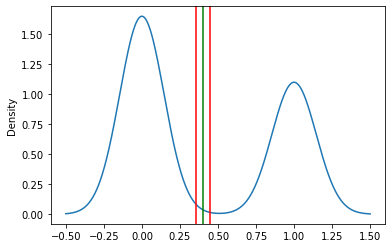

Democrat votes on duty-free  with a mean of  0.4
Mean - MOE = 0.35378088074308217
Mean + MOE = 0.4462191192569179


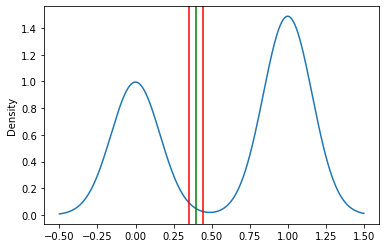

Republican votes on duty-free  with a mean of  0.4
Mean - MOE = 0.35378088074308217
Mean + MOE = 0.4462191192569179


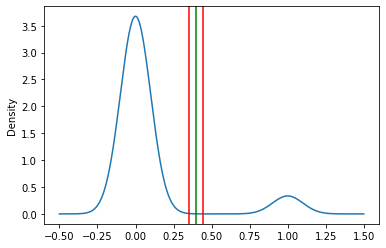

In [195]:
# Choose a bill and set variable then run cell

bill = 'duty-free'
ci_graph(bill)

             physician-fee-freeze            
Total Yes votes = 177
Democrat votes =  14
Republican votes =  163
Graph of total votes with a mean of  0.4068965517241379
Mean - MOE =  0.36054937608295906  and mean + MOE =  0.45324372736531676


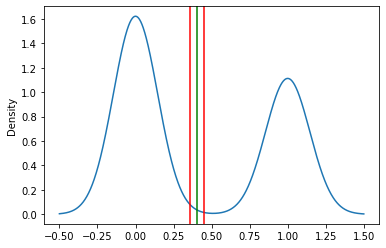

Democrat votes on physician-fee-freeze  with a mean of  0.4068965517241379
Mean - MOE = 0.36054937608295906
Mean + MOE = 0.45324372736531676


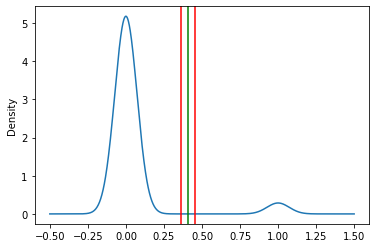

Republican votes on physician-fee-freeze  with a mean of  0.4068965517241379
Mean - MOE = 0.36054937608295906
Mean + MOE = 0.45324372736531676


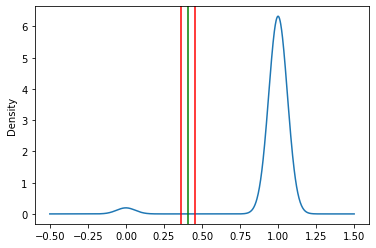

In [196]:
# Choose a bill and set variable then run cell

bill = 'physician-fee-freeze'
ci_graph(bill)

                water-project                
Total Yes votes = 195
Democrat votes =  120
Republican votes =  75
Graph of total votes with a mean of  0.4482758620689655
Mean - MOE =  0.4013567576173119  and mean + MOE =  0.4951949665206192


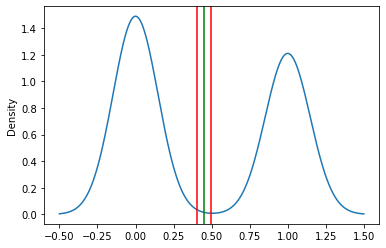

Democrat votes on water-project  with a mean of  0.4482758620689655
Mean - MOE = 0.4013567576173119
Mean + MOE = 0.4951949665206192


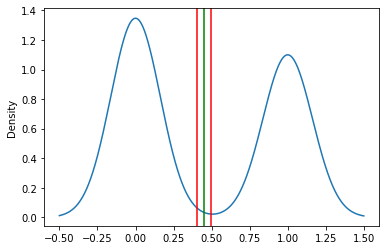

Republican votes on water-project  with a mean of  0.4482758620689655
Mean - MOE = 0.4013567576173119
Mean + MOE = 0.4951949665206192


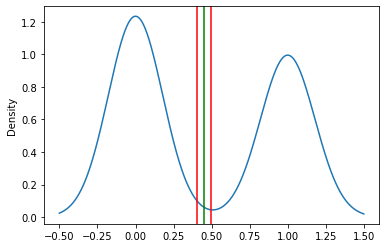

In [197]:
# Choose a bill and set variable then run cell

bill = 'water-project'
ci_graph(bill)

                 immigration                 
Total Yes votes = 216
Democrat votes =  124
Republican votes =  92
Graph of total votes with a mean of  0.496551724137931
Mean - MOE =  0.44938065490473084  and mean + MOE =  0.5437227933711312


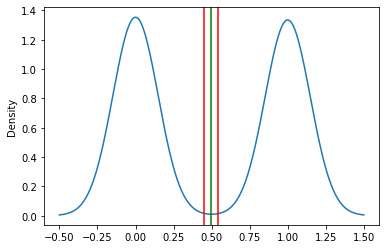

Democrat votes on immigration  with a mean of  0.496551724137931
Mean - MOE = 0.44938065490473084
Mean + MOE = 0.5437227933711312


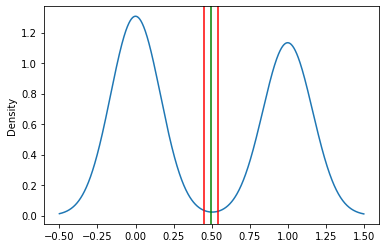

Republican votes on immigration  with a mean of  0.496551724137931
Mean - MOE = 0.44938065490473084
Mean + MOE = 0.5437227933711312


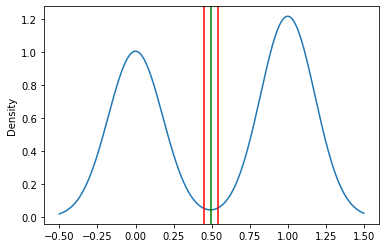

In [198]:
# Choose a bill and set variable then run cell

bill = 'immigration'
ci_graph(bill)

# Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

import numpy as np

# observed frequencies
observed_frequencies = np.array([27,13,10,15,30,32])

# expected frequency
expected_frequency = np.array([27,13,10,15,30,32]).sum()/6
expected_frequency = np.array([27,13,10,15,30,32]).mean()

# Expected Frequencies
expected_frequencies = np.array([expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency])

expected_frequencies

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
df['handicapped-infants'].value_counts(dropna=False)

0.0    236
1.0    187
NaN     12
Name: handicapped-infants, dtype: int64

In [0]:
df['handicapped-infants'].isnull().sum()

12

cols1 = ['bill', 'rep', 'dem', 'tstat', 'pvalue']

lst1 = []


bills =['handicapped-infants','water-project','budget',
        'physician-fee-freeze','el-salvador-aid','religious-groups',
        'anti-satellite-ban','aid-to-contras','mx-missile','immigration',
        'synfuels','education','right-to-sue','crime','duty-free',
        'south-africa']

for x in bills:
  r = int(rep[x].sum())
  d = int(dem[x].sum())
  s = stats.ttest_ind(rep[x], dem[x], nan_policy='omit')
 

  lst1.append([x,r,d, s[0], s[1]])


pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_vc = pd.DataFrame(lst1, columns=cols1)

print()

df_vc.head()

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
parties = ['republican','democrat']
cols = ['bill', 'rep_yes', 'dem_yes', 'rep_no', 'dem_no', 'rep_a', 'dem_a']

lst = []


bills =['handicapped-infants','water-project','budget',
        'physician-fee-freeze','el-salvador-aid','religious-groups',
        'anti-satellite-ban','aid-to-contras','mx-missile','immigration',
        'synfuels','education','right-to-sue','crime','duty-free',
        'south-africa']

for p in parties:

  for x in bills:
    # r = int(rep[x].sum())
    # d = int(dem[x].sum())
    


    lst1.append([x,r,d, s[0], s[1]])
    





df_vc = pd.DataFrame(lst1, columns=cols1)

print()

df_vc.head()

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)